In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
%matplotlib inline

plt.rcParams['figure.figsize'] = (16, 9)

In [58]:
df = pd.read_csv("pima_indians_diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [59]:
X = df[['Glucose','BloodPressure','BMI']]
y = df[['Outcome']]

In [60]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X['Glucose'], X['BloodPressure'], X['BMI'])

<Figure size 1600x900 with 0 Axes>

In [61]:
# Initializing KMeans
kmeans = KMeans(n_clusters=2)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
print(C)

C:\Users\albus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\albus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


[[154.16961131  74.98233216  34.23180212]
 [101.47835052  65.67628866  30.68597938]]


In [62]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X['Glucose'], X['BloodPressure'], X['BMI'], c=labels)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)

<Figure size 1600x900 with 0 Axes>

In [63]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 
        'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df[['Outcome']]

In [64]:
# Initializing KMeans
kmeans = KMeans(n_clusters=3)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
print(C)

C:\Users\albus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\albus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


[[3.98181818e+00 1.14008081e+02 6.77717172e+01 1.49979798e+01
  1.44000000e+01 3.08054545e+01 4.31931313e-01 3.37595960e+01]
 [3.52765957e+00 1.29327660e+02 7.14468085e+01 3.03063830e+01
  1.59102128e+02 3.39893617e+01 5.40276596e-01 3.19021277e+01]
 [4.02631579e+00 1.58447368e+02 7.20000000e+01 3.22631579e+01
  4.41289474e+02 3.51078947e+01 5.69210526e-01 3.47631579e+01]]


C:\Users\albus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\albus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\albus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\albus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

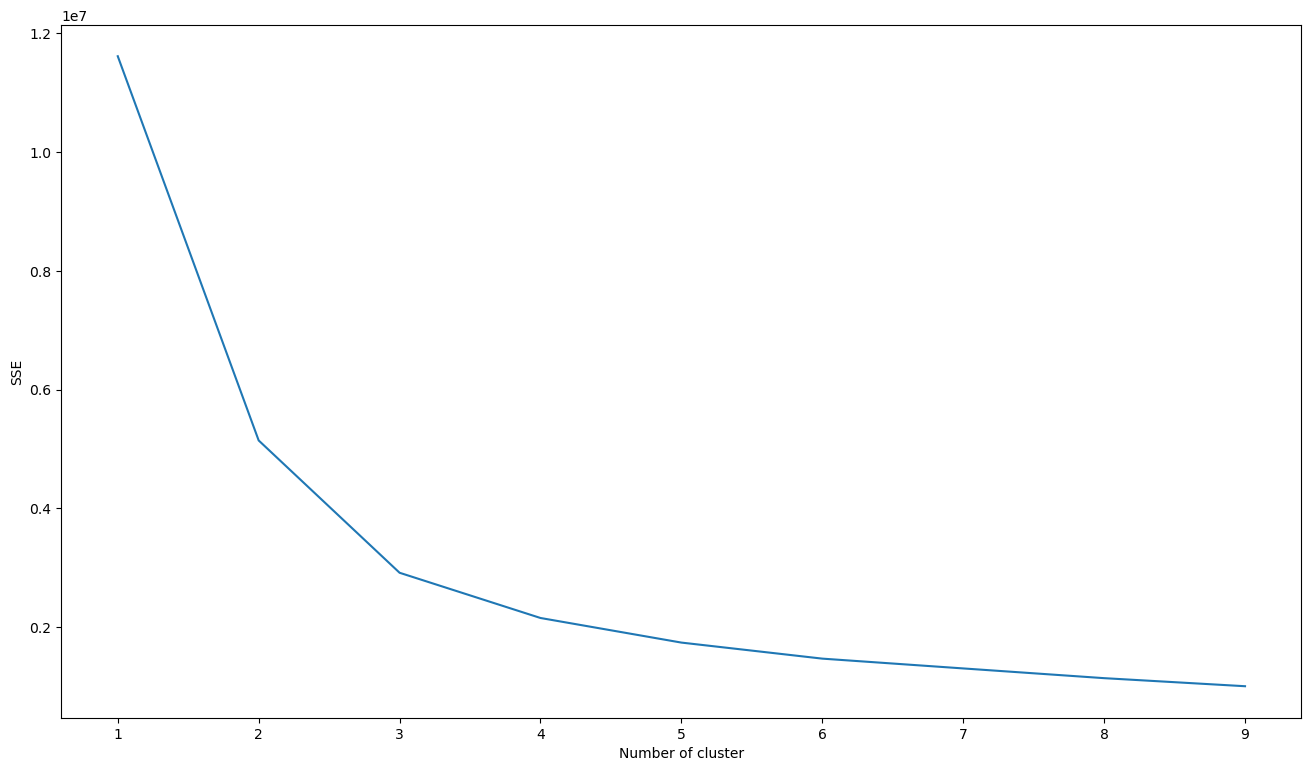

In [65]:
sse = {}
for k in range(1, 10):
    kmeans_eb = KMeans(n_clusters=k, max_iter=1000).fit(X)
    # X["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans_eb.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [66]:
sse

{1: 11615812.918327227,
 2: 5142376.455984382,
 3: 2913322.58008178,
 4: 2151320.938003855,
 5: 1736866.892228902,
 6: 1466591.4021123825,
 7: 1301534.094343038,
 8: 1137594.5636125263,
 9: 1001772.5251423423}

In [67]:
df_result = pd.concat([df.reset_index(), pd.Series(labels)], axis=1)

In [68]:
df_result.columns = ['Index','Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 
        'BMI', 'DiabetesPedigreeFunction', 'Age','Outcome','Cluster']

In [69]:
df_result.head()

,Index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Cluster
0,0,6,148,72,35,0,33.6,0.627,50,1,0
1,1,1,85,66,29,0,26.6,0.351,31,0,0
2,2,8,183,64,0,0,23.3,0.672,32,1,0
3,3,1,89,66,23,94,28.1,0.167,21,0,1
4,4,0,137,40,35,168,43.1,2.288,33,1,1


In [70]:
df_result.query('Outcome != Cluster')

,Index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Cluster
0,0,6,148,72,35,0,33.6,0.627,50,1,0
2,2,8,183,64,0,0,23.3,0.672,32,1,0
3,3,1,89,66,23,94,28.1,0.167,21,0,1
6,6,3,78,50,32,88,31.0,0.248,26,1,0
8,8,2,197,70,45,543,30.5,0.158,53,1,2
...,...,...,...,...,...,...,...,...,...,...,...
759,759,6,190,92,0,0,35.5,0.278,66,1,0
761,761,9,170,74,31,0,44.0,0.403,43,1,0
763,763,10,101,76,48,180,32.9,0.171,63,0,1
765,765,5,121,72,23,112,26.2,0.245,30,0,1


In [71]:
# define X and y
X = df[['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Glucose']]

y = df['Outcome']

In [72]:
# split X and y |into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [73]:
from sklearn.ensemble import RandomForestClassifier

# instantiate model
model = RandomForestClassifier(random_state=1, max_depth=10)

# fit model
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=1)

In [74]:
# make estimations for the testing set
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [75]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.roc_auc_score(y_test, y_pred))

0.8246753246753247
0.7989898989898989


In [76]:
y_pred = model.predict(X)

In [77]:
df_result = pd.concat([df_result.reset_index(), pd.Series(y_pred)], axis=1)

In [78]:
df_result.head()

,index,Index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Cluster,0
0,0,0,6,148,72,35,0,33.6,0.627,50,1,0,1
1,1,1,1,85,66,29,0,26.6,0.351,31,0,0,0
2,2,2,8,183,64,0,0,23.3,0.672,32,1,0,1
3,3,3,1,89,66,23,94,28.1,0.167,21,0,1,0
4,4,4,0,137,40,35,168,43.1,2.288,33,1,1,1
